In [47]:
import numpy as np
import matplotlib.pyplot as plt
from algepy.QuadraticStructures import QuadIntRing
from algepy.DiscreteFunctions import PrimalityTesting


## d = -3: hexagonal lattice

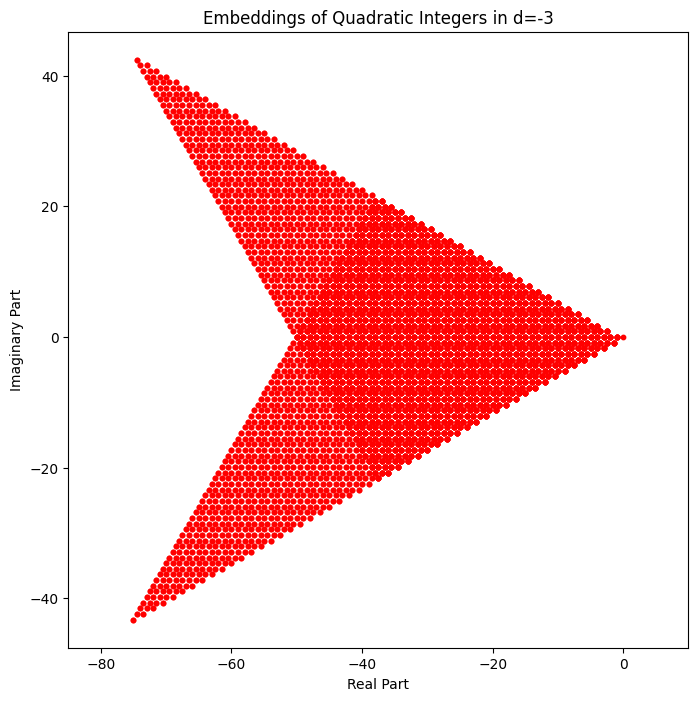

In [48]:
ring = QuadIntRing(-3, force_ufd=True)
a_values = range(-50, 51)
b_values = range(-50, 51)
embedded_points = []

for a in a_values:
    for b in b_values:
        z = ring(a, b)
        z_norm = z.normalize()
        c = ring.embed(z_norm)
        embedded_points.append(c.to_tuple())

embedded_points = np.array(embedded_points)

plt.figure(figsize=(8, 8))
plt.scatter(embedded_points[:, 0], embedded_points[:, 1], s=10, color='red')
plt.title("Embeddings of Quadratic Integers in d=-3")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.axis('equal')
plt.show()

## Primality spiral

In [49]:
def is_prime(n):
    if n < 2:
        return False
    return PrimalityTesting.eratosthenes_primality(n)

In [50]:
def ulam_spiral(size):
    grid = np.zeros((size, size), dtype=int)
    
    r, c = size // 2, size // 2
    
    current_num = 1
    grid[r, c] = current_num
    current_num += 1
    
    step = 1
    while current_num <= size * size:
        for _ in range(step):
            r -= 1
            if 0 <= r < size and 0 <= c < size:
                grid[r, c] = current_num
            current_num += 1
            if current_num > size*size: 
                break
        
        for _ in range(step):
            c += 1
            if 0 <= r < size and 0 <= c < size:
                grid[r, c] = current_num
            current_num += 1
            if current_num > size*size:
                break
        
        step += 1
        
        for _ in range(step):
            r += 1
            if 0 <= r < size and 0 <= c < size:
                grid[r, c] = current_num
            current_num += 1
            if current_num > size*size:
                break
        
        for _ in range(step):
            c -= 1
            if 0 <= r < size and 0 <= c < size:
                grid[r, c] = current_num
            current_num += 1
            if current_num > size*size:
                break
        
        step += 1
    
    return grid


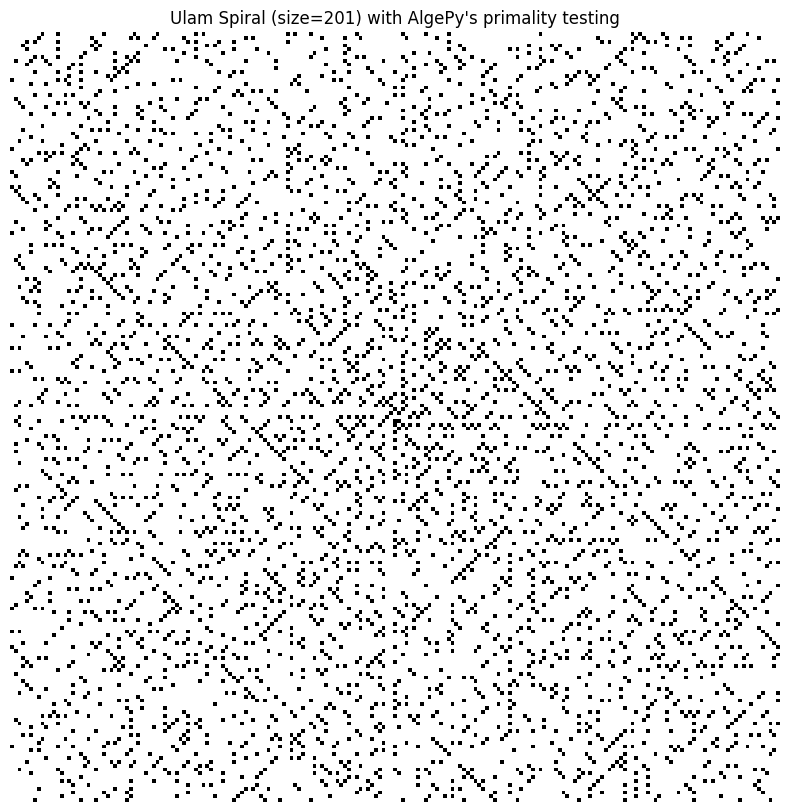

In [52]:
size = 201
spiral = ulam_spiral(size)

prime_mask = np.zeros((size, size), dtype=bool)
for i in range(size):
    for j in range(size):
        if is_prime(spiral[i, j]):
            prime_mask[i, j] = True

plt.figure(figsize=(10, 10))
plt.imshow(prime_mask.astype(int), cmap='binary', origin='lower')
plt.title("Ulam Spiral (size={}) with AlgePy's primality testing".format(size))
plt.axis('off')
plt.show()